<a href="https://colab.research.google.com/github/SeyedMehdi110/Adult-Census-Income/blob/master/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('Google_Stock_Price_Train.csv')
print(data.head(10))
data.shape

        Date    Open    High     Low   Close      Volume
0   1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1   1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2   1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3   1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4   1/9/2012  322.04  322.29  309.46  620.76  11,688,800
5  1/10/2012  313.70  315.72  307.30  621.43   8,824,000
6  1/11/2012  310.59  313.52  309.40  624.25   4,817,800
7  1/12/2012  314.43  315.26  312.08  627.92   3,764,400
8  1/13/2012  311.96  312.30  309.37  623.28   4,631,800
9  1/17/2012  314.81  314.81  311.67  626.86   3,832,800


(1258, 6)

In [3]:
data.Close=data.Close.str.replace(',', '').astype(float)
data.Volume=data.Volume.str.replace(',', '').astype(float)

In [4]:
print(data.head(10))

        Date    Open    High     Low   Close      Volume
0   1/3/2012  325.25  332.83  324.97  663.59   7380500.0
1   1/4/2012  331.27  333.87  329.08  666.45   5749400.0
2   1/5/2012  329.83  330.75  326.89  657.21   6590300.0
3   1/6/2012  328.34  328.77  323.68  648.24   5405900.0
4   1/9/2012  322.04  322.29  309.46  620.76  11688800.0
5  1/10/2012  313.70  315.72  307.30  621.43   8824000.0
6  1/11/2012  310.59  313.52  309.40  624.25   4817800.0
7  1/12/2012  314.43  315.26  312.08  627.92   3764400.0
8  1/13/2012  311.96  312.30  309.37  623.28   4631800.0
9  1/17/2012  314.81  314.81  311.67  626.86   3832800.0


Text(0, 0.5, 'Stock Volume')

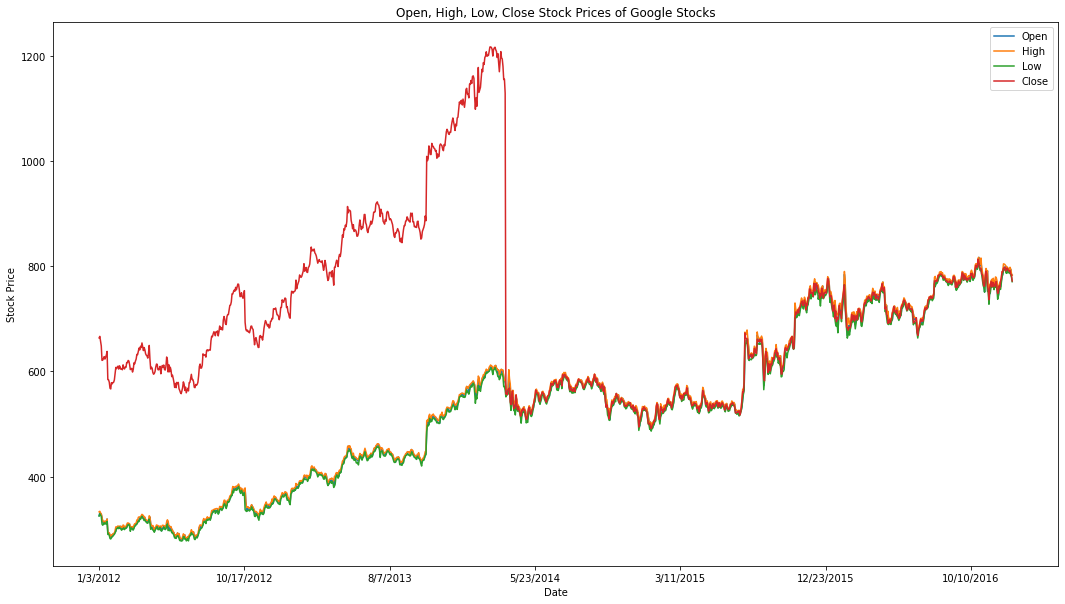

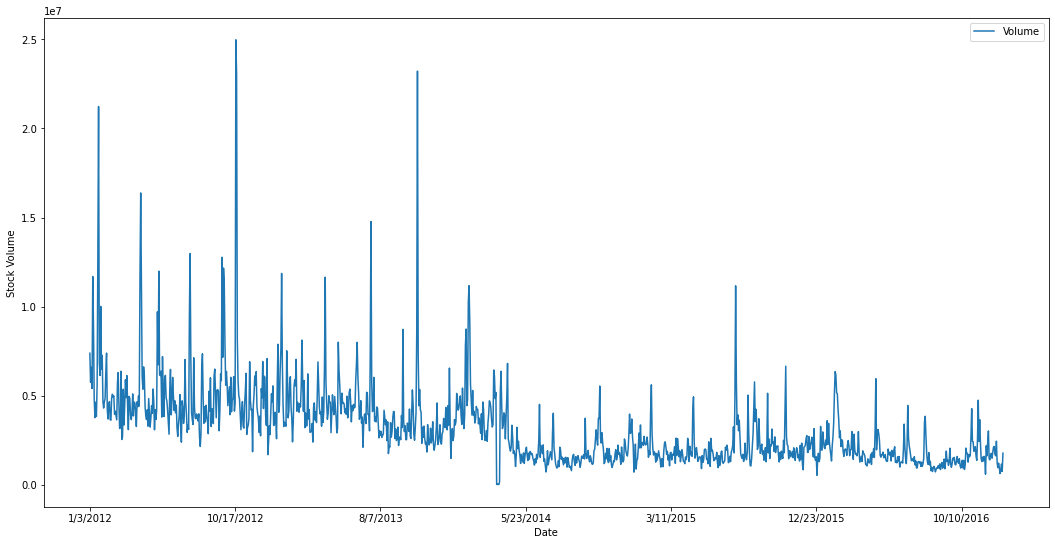

In [5]:
ax1 = data.plot(x="Date", y=["Open", "High", "Low", "Close"],  figsize=(18,10),title='Open, High, Low, Close Stock Prices of Google Stocks')
ax1.set_ylabel("Stock Price")

ax2 = data.plot(x="Date", y=["Volume"],  figsize=(18,9))
ax2.set_ylabel("Stock Volume")

In [6]:
# Getting a summary of missing values for each field/attribute
print(data.isnull().sum())

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


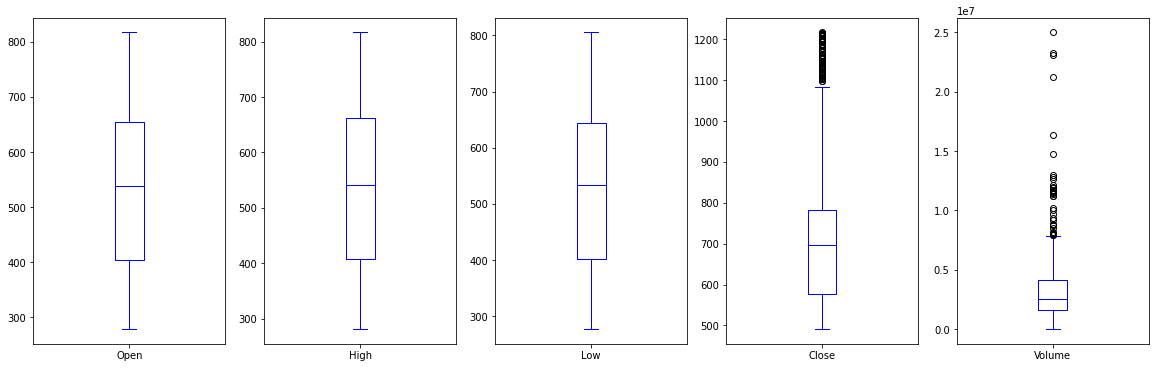

In [7]:

data[['Open','High','Low','Close','Volume']].plot(kind= 'box' ,layout=(1,5),subplots=True, sharex=False, sharey=False, figsize=(20,6),color='blue')
plt.show()

In [8]:
scaler = MinMaxScaler()
data_without_date = data[['Open','High','Low','Close','Volume']]
data_scaled = pd.DataFrame(scaler.fit_transform(data_without_date))

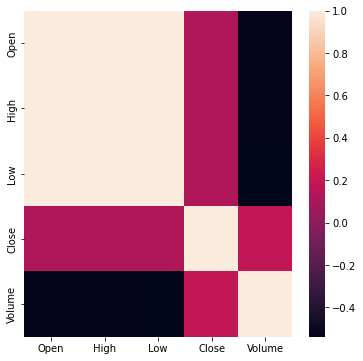

In [9]:

plt.figure(figsize=(6,6))
sns.heatmap(data.corr())

In [10]:
data_scaled=data_scaled.drop([0,2,3], axis=1)
data_scaled

,1,4
0,0.096401,0.295258
1,0.098344,0.229936
2,0.092517,0.263612
3,0.088819,0.216179
4,0.076718,0.467797
...,...,...
1253,0.955292,0.024650
1254,0.964853,0.031286
1255,0.958074,0.045891
1256,0.942574,0.029491


In [11]:
def split_seq_multivariate(sequence, n_past, n_future):
    
    '''
    n_past ==> no of past observations
    n_future ==> no of future observations 
    '''
    x, y = [], [] 
    for window_start in range(len(sequence)):
        past_end = window_start + n_past
        future_end = past_end + n_future
        if future_end > len(sequence):
            break
        # slicing the past and future parts of the window
        past   = sequence[window_start:past_end, :]
        future = sequence[past_end:future_end, -1]
        x.append(past)
        y.append(future)
    
    return np.array(x), np.array(y)

In [12]:
# specify the window size
n_steps = 60

data_scaled = data_scaled.to_numpy()
data_scaled.shape

(1258, 2)

In [13]:

# split into samples
X, y = split_seq_multivariate(data_scaled, n_steps,1)

In [14]:
# X is in the shape of [samples, timesteps, features]
print(X.shape)
print(y.shape)

# make y to the shape of [samples]
y=y[:,0]
y.shape

(1198, 60, 2)
(1198, 1)


(1198,)

In [15]:
# further dividing the training set into train and validation data
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=30)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(958, 60, 2) (240, 60, 2) (958,) (240,)


In [16]:
# define RNN model
model = Sequential()
model.add(LSTM(612, input_shape=(n_steps,2)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 612)               1505520   
_________________________________________________________________
dense (Dense)                (None, 50)                30650     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 1,540,281
Trainable params: 1,540,281
Non-trainable params: 0
_________________________________________________________________


In [18]:
# compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [19]:
# fit the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2, validation_data=(X_val, y_val))  # has used mini batch learning, with batch_size=32

Epoch 1/50
30/30 - 23s - loss: 0.0064 - mae: 0.0499 - val_loss: 0.0067 - val_mae: 0.0394
Epoch 2/50
30/30 - 21s - loss: 0.0043 - mae: 0.0380 - val_loss: 0.0060 - val_mae: 0.0424
Epoch 3/50
30/30 - 21s - loss: 0.0042 - mae: 0.0391 - val_loss: 0.0061 - val_mae: 0.0382
Epoch 4/50
30/30 - 21s - loss: 0.0040 - mae: 0.0364 - val_loss: 0.0057 - val_mae: 0.0407
Epoch 5/50
30/30 - 21s - loss: 0.0039 - mae: 0.0364 - val_loss: 0.0055 - val_mae: 0.0384
Epoch 6/50
30/30 - 21s - loss: 0.0037 - mae: 0.0363 - val_loss: 0.0058 - val_mae: 0.0459
Epoch 7/50
30/30 - 21s - loss: 0.0035 - mae: 0.0357 - val_loss: 0.0057 - val_mae: 0.0380
Epoch 8/50
30/30 - 21s - loss: 0.0033 - mae: 0.0335 - val_loss: 0.0054 - val_mae: 0.0376
Epoch 9/50
30/30 - 21s - loss: 0.0033 - mae: 0.0341 - val_loss: 0.0053 - val_mae: 0.0371
Epoch 10/50
30/30 - 21s - loss: 0.0032 - mae: 0.0339 - val_loss: 0.0053 - val_mae: 0.0373
Epoch 11/50
30/30 - 21s - loss: 0.0031 - mae: 0.0329 - val_loss: 0.0055 - val_mae: 0.0342
Epoch 12/50
30/30 -

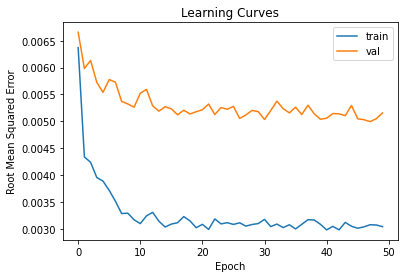

In [20]:
from matplotlib import pyplot
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Root Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [21]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')

dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [22]:
dataset_test.Volume=dataset_test.Volume.str.replace(',', '').astype(float)

In [23]:
scaler = MinMaxScaler()
data_without_date = dataset_test[['Open','High','Low','Close','Volume']]
data_scaled_test = pd.DataFrame(scaler.fit_transform(data_without_date))

In [24]:
data_scaled_test=data_scaled_test.drop([0,2,3], axis=1)
data_scaled_test

,1,4
0,0.000000,0.317106
1,0.032683,0.066042
2,0.092699,0.178705
3,0.349197,0.309758
4,0.388761,0.151721
5,0.372706,0.110643
6,0.353976,0.062991
7,0.339450,0.186396
8,0.412653,0.077300
9,0.334671,0.190263


In [25]:
data1=np.concatenate((data_scaled,data_scaled_test))


In [26]:
# split into samples
X_test, y_test = split_seq_multivariate(data1, n_steps,1)

In [27]:
# predicting y_test values
print(X_test.shape)
predicted_values = model.predict(X_test)
print(predicted_values.shape)
# print(predicted_values)


(1218, 60, 2)
(1218, 1)


<Figure size 720x432 with 0 Axes>

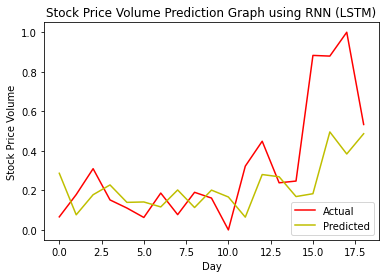

<Figure size 720x432 with 0 Axes>

In [28]:
plt.plot(y_test[1199:],c = 'r')
plt.plot(predicted_values[1199:],c = 'y')
plt.xlabel('Day')
plt.ylabel('Stock Price Volume')
plt.title('Stock Price Volume Prediction Graph using RNN (LSTM)')
plt.legend(['Actual','Predicted'],loc = 'lower right')
plt.figure(figsize=(10,6))

In [29]:
# evaluating using R squared
R_square = r2_score(y_test[1199:], predicted_values[1199:]) 
 
print(R_square)

0.21418417641032028
